# Example calculating $C_3$ and $C_6$ coefficients

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pairinteraction.real as pi
from pairinteraction import perturbative

In [2]:
if pi.Database.get_global_database() is None:
    pi.Database.initialize_global_database(download_missing=True)

## Example to calculate the angular dependence of the $C_3$ coefficient

In [3]:
ket_one = pi.KetAtom("Rb", n=61, l=0, j=0.5, m=0.5)
ket_two = pi.KetAtom("Rb", n=62, l=1, j=1.5, m=0.5)

ket_tuple_list = [(ket_one, ket_two), (ket_two, ket_one)]
pair_energy = ket_one.get_energy("GHz") + ket_two.get_energy("GHz")

basis = pi.BasisAtom(
    species=ket_one.species,
    n=(ket_one.n - 5, ket_one.n + 5),
    l=(max(ket_one.l - 1, 0), ket_one.l + 1),
    j=(max(ket_one.j - 1.5, 0.5), ket_one.l + 1.5),
)

system = pi.SystemAtom(basis=basis)
system.set_diamagnetism_enabled(False)
system.set_magnetic_field([0, 0, 20], "gauss")
pi.diagonalize([system], diagonalizer="eigen", sort_by_energy=False)

delta_energy = 5  # GHz
basis_pair = pi.BasisPair(
    [system, system], energy=(pair_energy - delta_energy, pair_energy + delta_energy), energy_unit="GHz"
)
system_pair = pi.SystemPair(basis_pair)
system_pair.set_order(3)

SystemPairReal(BasisPairReal(|Rb:58,S_1/2,-1/2; Rb:66,P_1/2,-1/2⟩ ... |Rb:66,P_3/2,3/2; Rb:58,S_1/2,1/2⟩), is_diagonal=True)

In [4]:
C3_coeffs = []
thetas = np.linspace(0, np.pi, 20)
for theta in thetas:
    system_pair.set_distance_vector(8 * np.array([np.sin(theta), 0, np.cos(theta)]), "micrometer")
    C3_coeffs.append(
        perturbative.get_c3_from_system(ket_tuple_list, system_pair, unit="planck_constant * GHz * micrometer^3")
    )

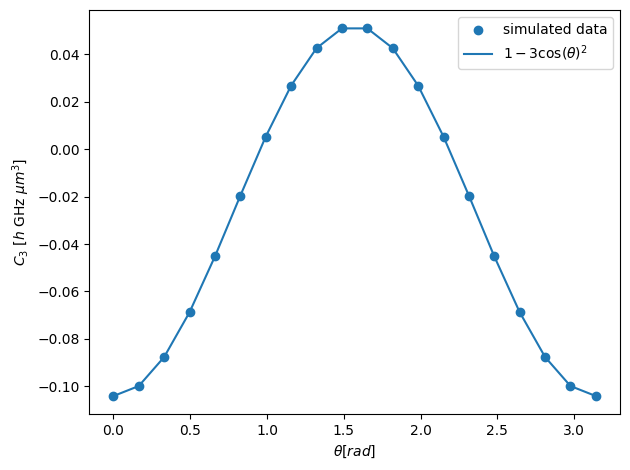

In [5]:
fig, ax = plt.subplots()
ax.scatter(thetas, C3_coeffs, label="simulated data")
ax.plot(thetas, -0.5 * C3_coeffs[0] * (1 - 3 * np.cos(thetas) ** 2), label=r"$1-3\cos(\theta)^2$")
ax.legend()
ax.set_xlabel(r"$\theta [rad]$")
ax.set_ylabel(r"$C_3$ [$h$ GHz $\mu m^3$]")
fig.tight_layout()

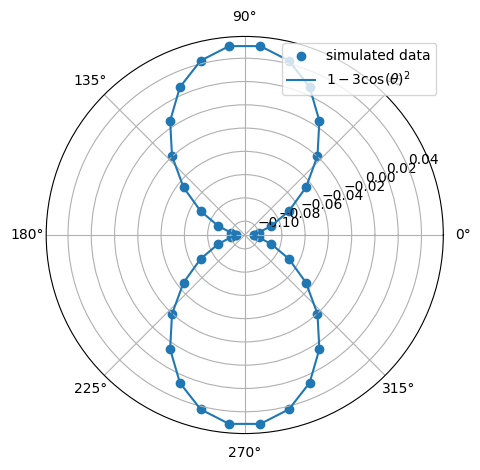

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "polar"})
ax.scatter(np.append(thetas, thetas + np.pi), np.append(C3_coeffs, C3_coeffs), label="simulated data")
ax.plot(
    np.append(thetas, thetas + np.pi),
    -0.5 * C3_coeffs[0] * (1 - 3 * np.cos(np.append(thetas, thetas + np.pi)) ** 2),
    label=r"$1-3\cos(\theta)^2$",
)
ax.legend()
fig.tight_layout()

## Example to calculate the angular dependence of the $C_6$ coefficient

In [7]:
ket = pi.KetAtom("Rb", n=61, l=0, j=0.5, m=0.5)
pair_energy = 2 * ket.get_energy("GHz")

basis = pi.BasisAtom(
    species=ket.species,
    n=(ket.n - 5, ket.n + 5),
    l=(max(ket.l - 1, 0), ket.l + 1),
    j=(max(ket.j - 1.5, 0.5), ket.l + 1.5),
)

system = pi.SystemAtom(basis=basis)
system.set_diamagnetism_enabled(False)
system.set_magnetic_field([0, 0, 20], "gauss")
pi.diagonalize([system], diagonalizer="eigen", sort_by_energy=False)

delta_energy = 5  # GHz
basis_pair = pi.BasisPair(
    [system, system], energy=(pair_energy - delta_energy, pair_energy + delta_energy), energy_unit="GHz"
)
system_pair = pi.SystemPair(basis_pair)
system_pair.set_order(3)

SystemPairReal(BasisPairReal(|Rb:57,S_1/2,-1/2; Rb:66,S_1/2,-1/2⟩ ... |Rb:66,S_1/2,1/2; Rb:57,S_1/2,1/2⟩), is_diagonal=True)

In [8]:
C6_coeffs = []
thetas = np.linspace(0, np.pi, 20)
for theta in thetas:
    system_pair.set_distance_vector(8 * np.array([np.sin(theta), 0, np.cos(theta)]), "micrometer")
    C6_coeffs.append(
        perturbative.get_c6_from_system([ket, ket], system_pair, unit="planck_constant * GHz * micrometer^6")
    )

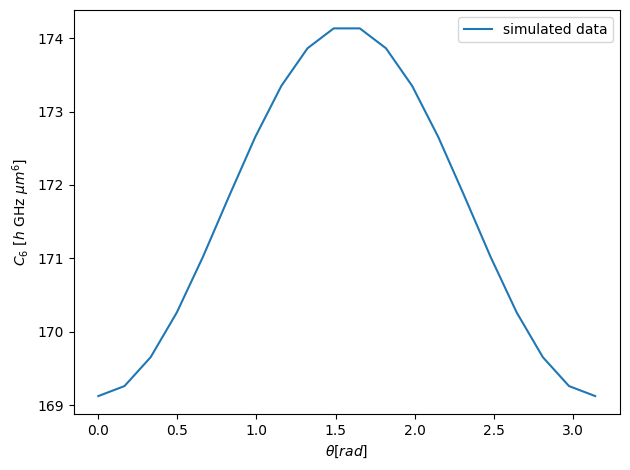

In [9]:
fig, ax = plt.subplots()
ax.plot(thetas, C6_coeffs, label="simulated data")
ax.legend()
ax.set_xlabel(r"$\theta [rad]$")
ax.set_ylabel(r"$C_6$ [$h$ GHz $\mu m^6$]")
fig.tight_layout()

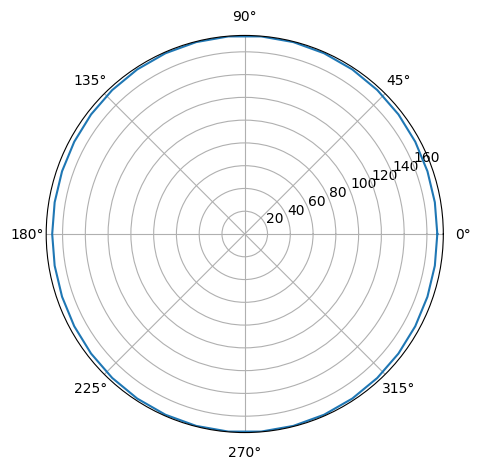

In [10]:
fig, ax = plt.subplots(subplot_kw={"projection": "polar"})
ax.plot(np.append(thetas, thetas + np.pi), np.append(C6_coeffs, C6_coeffs), label="simulated data")
fig.tight_layout()